In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
img_width,img_height=224,224

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 Conv2D True
10 BatchNormalization True
11 ReLU True
12 ZeroPadding2D True
13 DepthwiseConv2D True
14 BatchNormalization True
15 ReLU True
16 Conv2D True
17 BatchNormalization True
18 Conv2D True
19 BatchNormalization True
20 ReLU True
21 DepthwiseConv2D True
22 BatchNormalization True
23 ReLU True
24 Conv2D True
25 BatchNormalization True
26 Add True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 ZeroPadding2D True
31 DepthwiseConv2D True
32 BatchNormalization True
33 ReLU True
34 Conv2D True
35 BatchNormalization True
36 Conv2D True
37 BatchNormalization True
38 ReLU True
39 DepthwiseConv2D True
40 BatchNormalization True
41 ReLU True
42 Conv2D True
43 BatchNormalization True
44 Add True
45 Conv2D True
46 BatchNormalization True
47 ReLU True
48 DepthwiseConv2D True
49 BatchNormalization True
50 ReLU True

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 Conv2D False
10 BatchNormalization False
11 ReLU False
12 ZeroPadding2D False
13 DepthwiseConv2D False
14 BatchNormalization False
15 ReLU False
16 Conv2D False
17 BatchNormalization False
18 Conv2D False
19 BatchNormalization False
20 ReLU False
21 DepthwiseConv2D False
22 BatchNormalization False
23 ReLU False
24 Conv2D False
25 BatchNormalization False
26 Add False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 ZeroPadding2D False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 Conv2D False
37 BatchNormalization False
38 ReLU False
39 DepthwiseConv2D False
40 BatchNormalization False
41 ReLU False
42 Conv2D False
43 BatchNormalization False
44 Add False
45 Conv2D False
46 BatchNormalization False
47 ReLU False
48 DepthwiseCon

In [ ]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir='/content/drive/MyDrive/herbs_dataset_train'
val_data_dir='/content/drive/MyDrive/herbs_dataset_test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size=32

In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')


Found 65 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
train_class_names = set()
num_train_samples=0
for i in train_generator.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
print(num_train_samples)
train_class_names

65


{'Aloevera', 'Ashwagandha', 'Neem', 'Tulasi'}

In [ ]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
val_class_names

20


{'Alovera', 'Ashwagandha', 'Neem', 'Tulasi'}

In [ ]:
num_classes=len(train_generator.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

4


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 5,146,180 (19.63 MB)

 Trainable params: 2,888,196 (11.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("saved_model.keras",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.001),
                   metrics=['accuracy'])

epochs=50

# batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2969 - loss: 3.5690  
Epoch 1: val_loss improved from inf to 13.40790, saving model to saved_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 17s/step - accuracy: 0.2917 - loss: 4.2906 - val_accuracy: 0.2500 - val_loss: 13.4079
Epoch 2/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 21.1709

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 13.40790 to 3.75076, saving model to saved_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 21.1709 - val_accuracy: 0.2500 - val_loss: 3.7508
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1212 - loss: 4.1357      
Epoch 3: val_loss improved from 3.75076 to 1.61713, saving model to saved_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1616 - loss: 3.8206 - val_accuracy: 0.3000 - val_loss: 1.6171
Epoch 4/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.5736
Epoch 4: val_loss improved from 1.61713 to 1.29717, saving model to saved_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2500 - loss: 1.5736 - val_accuracy: 0.4000 - val_loss: 1.2972
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5391 - loss: 1.1206
Epoch 5: val_loss improved from 1.29717 to 0.74579, saving model to saved_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5521 - loss:

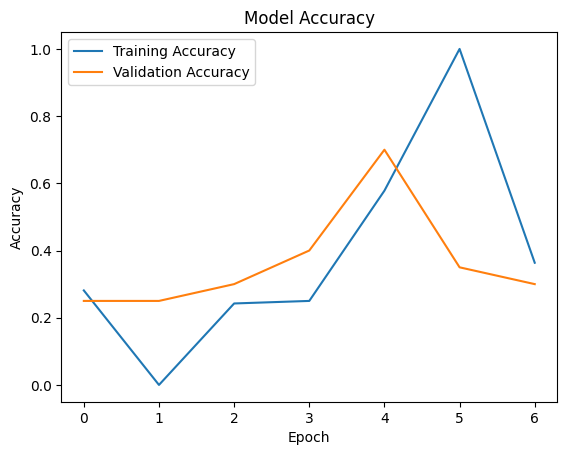

In [ ]:
# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
val_loss, val_accuracy = main_model.evaluate(val_generator, steps=num_val_samples//batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - accuracy: 0.7000 - loss: 0.7458
Validation Loss: 0.7458
Validation Accuracy: 70.00%


In [ ]:
model = tf.keras.models.load_model('saved_model.keras')

In [ ]:
class_names = ['Aloevera', 'Ashwagandha','Neem','Tulasi']  #'Aloevera', 'Ashwagandha', 'Neem', 'Tulasi'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize image
    return img_array


In [ ]:
# Predict the image class
def predict_image(model, image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the index
    predicted_class_name = class_names[predicted_class_index]  # Get the class name
    return predicted_class_name

In [ ]:
image_path = '/content/860.jpg'
predicted_class_name = predict_image(model, image_path)
print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Aloevera


In [ ]:
image_path = '/content/download.jpeg'
predicted_class_name = predict_image(model, image_path)
print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted class: Aloevera


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential

img_height, img_width = 224, 224 # Assuming this is your image size, modify if needed

# Define input shape explicitly
input_tensor = Input(shape=(img_height, img_width, 3))

# Load the base model with the specified input tensor
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False

# Build the model using the Functional API
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model_VGG = Model(inputs=base_model.input, outputs=output)

model_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

class_weights = {0: 1.083, 1: 1.083, 2: 1.083, 3: 0.8125}

model_VGG.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,596 (68.38 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
epochs

50

In [ ]:
history = model_VGG.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=earlystop,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 34s/step - accuracy: 0.5354 - loss: 3.3426 - val_accuracy: 0.4500 - val_loss: 2.4802
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 15s/step - accuracy: 0.1875 - loss: 3.8003 - val_accuracy: 0.2500 - val_loss: 2.2762
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 57s 35s/step - accuracy: 0.3021 - loss: 2.9635 - val_accuracy: 0.4000 - val_loss: 1.5857
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 13s/step - accuracy: 0.0000e+00 - loss: 3.3116 - val_accuracy: 0.3000 - val_loss: 1.4682
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 74s 41s/step - accuracy: 0.4375 - loss: 1.5042 - val_accuracy: 0.6000 - val_loss: 0.9815
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 13s/step - accuracy: 1.0000 - loss: 0.0725 - val_accuracy: 0.6000 - val_loss: 1.0045
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 63s 42s/step - accuracy: 0.4062 - loss: 1.8705 - val_accuracy: 0.7500 - val_loss: 0.9819
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 20s/step - accuracy: 0.0000e+00 - loss: 2.9630 - val_accuracy: 0.5500 - val_loss:

In [ ]:
# Save the entire model
model.save('vgg_save_model.keras')

In [ ]:
image_path = '/content/3648.jpg'
predicted_class_name = predict_image(model_VGG, image_path)
print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
Predicted class: Aloevera


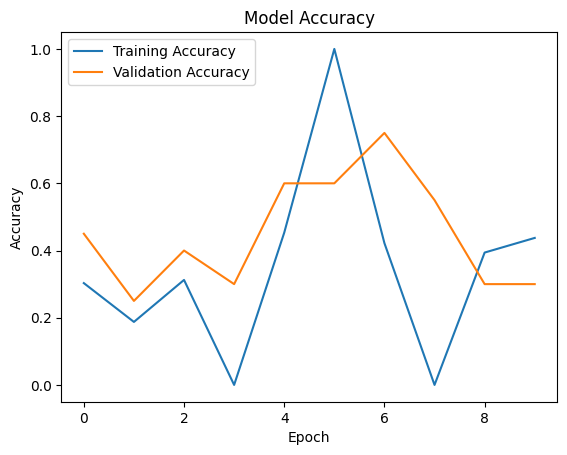

In [ ]:
# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
val_loss, val_accuracy = model_VGG.evaluate(val_generator, steps=validation_steps)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6000 - loss: 0.9815
Validation Accuracy: 60.00%
